# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Feature Selection](#Section7)<br>
8. [Model Development & Evaluation](#Section8)<br>
  8.1 [Baseline Models](#Section81)<br>
    - 8.1.1 [Logistic Regression](#Section811)<br>
    - 8.1.2 [Decision Tree Classifier](#Section812)<br>
    - 8.1.3 [Random Forest Classifier](#Section813)<br>
      
  8.2 [Oversampling Models](#Section82)<br>
    - 8.1.1 [Logistic Regression](#Section821)<br>
    - 8.1.2 [Decision Tree Classifier](#Section822)<br>
    - 8.1.3 [Random Forest Classifier](#Section823)<br>
9. [Conclusion](#Section9)<br>

<a id = Section1></a>
# **1. Introduction**

The Home Mortgage Disclosure Act (HMDA) requires many **financial institutions** to **maintain, report, and publicly disclose loan-level information** about **mortgages**. These **data help** show whether **lenders** are **serving** the **housing needs** of their communities; they **give** public officials **information** that **helps** them **make decisions and policies**; and they shed light on lending patterns that could be discriminatory. The **public data** are **modified** to **protect** applicant and borrower **privacy**.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Great_Seal_of_the_United_States_%28obverse%29.svg" width = "40%"></center>

**<center>HMDA was originally enacted by Congress in 1975 and is implemented by Regulation C.</center>**

In general, the **primary purposes** of the Home Mortgage Disclosure Act and Regulation C are to **monitor the geographic targets of mortgage lenders**, **provide** an **identification mechanism** for any predatory **lending practices**, and to **provide** reporting **statistics** on the mortgage market **to** the **government**.

<a id = Section2></a>
# **2. Problem Statement**

The problem here is to **analyze and predict** the **mortgage decisions** based on the **information provided to the machine**, **empowering** the **government** to take **rational decisions** about providing the **lending information** of the **borrower**.
<center><img src = "https://ocdn.eu/images/pulscms/NWQ7MDA_/cfe27a08-f80b-480f-b5bd-7914252c912b.jpeg"></center>

<br>

The **target feature** in the acquired data set is **action_taken** on the application of the applicant.<br>

|Target Feature|Potential Values|
| :-- | :-- |
|**action_taken**|1. Loan originated|
||2. Application approved but not accepted| 
||3. Application denied by financial institution|
||4. Application withdrawn by applicant|
||5. File closed for incompleteness|
||6. Loan purchased by the institution|


<a id = Section3></a>
# **3. Installing & Importing Libraries**

### **Installing Libraries**

In [0]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q yellowbrick                   # A visualization library for Machine Learning

### **Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [0]:
!pip install -q --upgrade pandas-profiling 

### **Importing Libraries**

In [0]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Numerical Python
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Preprocessing & Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# For Random seed value(s)
from random import randint

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# For Model Evaluation
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import plot_importance, to_graphviz

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

<a id = Section4></a>
# **4. Data Acquisition & Description**

This **dataset covers** all **mortgage decisions** made in **2015** for the state of **New York**. Data for additional states and years can be accessed <a href = "https://www.consumerfinance.gov/data-research/hmda/explore">here</a>. This dataset was **compiled by the Consumer Finance Protection Board** (CFPB) and we performed a little amount of modification.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 439650 | 38 | 224 MB|

| Id | Features | Description |
| :--| :--| :--|
|1|**action_taken**|Action taken on file. Contains: [Loan originated, Application approved but not accepted, Application denied by financial institution,|
||| Application withdrawn by applicant, File closed for incompleteness, Loan purchased by the institution]|
|2|**agency_name**|Name of the agency. Contains: [Consumer Financial Protection Bureau, Department of Housing and Urban Development, |
|||National Credit Union Administration, Office of the Comptroller of the Currency, Federal Deposit Insurance Corporation, Federal Reserve System]|
|3|**applicant_ethnicity**|A category of people who identify with each other, usually on the basis of presumed similarities. Contains: [Not Hispanic or Latino, Not applicable,|
|||Information not provided by applicant in mail, Internet, or telephone application, Hispanic or Latino]|
|4|**applicant_income_000s**|Applicant's Income (in thousands).|
|5|**applicant_race**|Race of the applicant. Contains: [White, Not applicable, Information not provided by applicant in mail,|
|||Internet, or telephone application, Black or African American, Asian, American Indian or Alaska Native , Native Hawaiian or Other Pacific Islander]|
|6|**applicant_sex**|Sex of the applicant. Contains: [male, female, Not applicable, Information not provided by applicant in mail,|
|||Internet, or telephone application]|
|7|**as_of_year**|Year at which data is acquired.|
|8|**census_tract_number**|It is an area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations.|
|9|**co_applicant_ethnicity_name**|Name of the co-applicant (Ethnicity refers to heritage, nationality group, lineage, or country of birth of the person|
|||or the person's parents or ancestors before their arrival in the United States.]|
|10|**co_applicant_race**|Race of the co-applicant. Contains: [No co-applicant, White, Not applicable, Information not provided by applicant in mail,|
|||Internet, or telephone application, Asian, Black or African American, American Indian or Alaska Native, Native Hawaiian or Other Pacific Islander]|
|11|**co_applicant_sex**|Sex of the Co-applicant. Contains: [No co-applicant, Female, Male, Not applicable, Information not provided by applicant in mail, Internet|
|||, or telephone application]|
|12|**country_code**|Country code.|
|13|**country_name**|Name of the country.|
|14|**denial_reason_1**|Reason 1 of the denial of the application. Contains: [Debt-to-income ratio, Credit history, Collateral, Credit application incomplete, Other,|
|||Unverifiable information, Insufficient cash (downpayment, closing costs), Employment history, Mortgage insurance denied]|
|15|**denial_reason_2**|Reason 2 of the denial of the application.|
|16|**denial_reason_3**|Reason 3 of the denial of the application.|
|17|**edit_status**|Edit status of the application. Contains value Quality edit failure only|
|18|**hoepa_status**|Status of HOEPA(Home Ownership and Equity Protection Act), Contains: [Not a HOPEA loan, HOPEA loan]|
|19|**lien_status**|Status of Lien(a form of security interest granted over an item of property to secure the payment of a debt or performance of some other obligation).|
|20|**loan_purpose**|Purpose of the loan. Contains: [Home purchase, Refinancing, Home improvement]|
|21|**loan_type**|Type of the loan. Contains: [Conventional, FHA-insured, VA-guaranteed, FSA/RHS-guaranteed]|
|22|**msamd**|MSA/MD(Metropolitan Statistical Area/Metropolitan Division) refers to property location.|
|23|**owner_occupancy**|Owner of the property. Contains: [Owner-occupied as a principal dwelling, Not owner-occupied as a principal dwelling, Not applicable]|
|24|**preapproval**|Requirement of preapproval of the application. Contains: [Not applicable, Preapproval was not requested, Preapproval was requested]|
|25|**property_type**|Type of the property. Contains: [ 1: One to four-family (other than manufactured housing), 2:Manufactured housing, 3: Multifamily]|
|26|**purchaser_type**|Type of purchaser. Contains: [Loan was not originated or was not sold in calendar year covered by register, Fannie Mae (FNMA),|
|||Ginnie Mae (GNMA), Freddie Mac (FHLMC), Commercial bank, savings bank or savings association, Life insurance company, credit union,|
|||mortgage bank, or finance company, Other type of purchaser, Affiliate institution, Private securitization, Farmer Mac (FAMC)]|
|27|**respondent_id**|Respondent ID. Contains alphanumeric  information.|
|28|**sequence_number**|One-up number scheme for each respondent to make each loan unique|
|29|**state_code**|Code of the state.|
|30|**state_name**|Name of the state.|
|31|**hud_median_family_income**|Median family income in dollars for the MSA/MD in which the tract is located (adjusted annually by FFIEC).|
|32|**loan_amount_000s**|Loan amount (in thousands).|
|33|**number_of_1_to_4_family_units**|Dwellings that are built to house fewer than 5 families.|
|34|**number_of_owner_occupied_units**|Number of dwellings, including individual condominiums, that are lived in by the owner.|
|35|**minority_population**|Percentage of minority population to total population for tract. (Carried to two decimal places)|
|36|**population**|Total population in tract.|
|37|**rate_spread**|Spread Rate of population.|
|38|**tract_to_msamd_income**|% of tract median family income compared to MSA/MD median family income. (Carried to two decimal places)|


In [0]:
LINK = 'https://storage.googleapis.com/industryanalytics/HMDA.csv'

def load_HMDA_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [0]:
data = load_HMDA_data()
print('Data Shape:', data.shape)
data.head(2)

Data Shape: (439650, 38)


,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,denial_reason_1,denial_reason_2,denial_reason_3,edit_status,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,respondent_id,sequence_number,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,97.0,White,Female,2015,3007.0,No co-applicant,No co-applicant,No co-applicant,59.0,Nassau County,NaN,NaN,NaN,NaN,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"Nassau County, Suffolk County - NY",Owner-occupied as a principal dwelling,Not applicable,1,Loan was not originated or was not sold in cal...,0000451965,164811,36,New York,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,200.0,White,Male,2015,111.0,No co-applicant,No co-applicant,No co-applicant,61.0,New York County,NaN,NaN,NaN,Quality edit failure only,Not a HOEPA loan,Secured by a first lien,Home purchase,Conventional,"New York, Jersey City, White Plains - NY, NJ",Owner-occupied as a principal dwelling,Not applicable,1,"Commercial bank, savings bank or savings assoc...",0002735146,26589,36,New York,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006


### **Data Description**

- In this section we will get **information about** the **data** and **analyze** some **observations**.

In [0]:
print('Described Columns Length:', len(data.describe().columns))
data.describe()

Described Columns Length: 15


,applicant_income_000s,as_of_year,census_tract_number,country_code,property_type,sequence_number,state_code,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
count,378647.000000,439650.0,437983.000000,438458.000000,439650.000000,4.396500e+05,439650.0,437983.000000,439650.000000,437414.000000,437601.000000,437954.000000,437954.000000,8740.000000,437879.000000
mean,140.146144,2015.0,1387.378051,66.594210,1.041881,1.046823e+05,36.0,78224.122626,333.324988,1511.688046,1214.081042,29.204901,4749.278573,2.525990,117.924942
std,268.472706,0.0,2427.443010,31.184619,0.256750,2.137956e+05,0.0,16235.276082,1173.209445,790.503492,609.377583,29.032503,1881.872064,1.587436,53.107402
min,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000e+00,36.0,57200.000000,1.000000,6.000000,2.000000,0.340000,1.000000,1.500000,3.670000
25%,58.000000,2015.0,127.000000,47.000000,1.000000,1.266000e+03,36.0,69000.000000,102.000000,965.000000,748.000000,7.780000,3439.000000,1.610000,87.949997
50%,90.000000,2015.0,305.010000,63.000000,1.000000,1.298150e+04,36.0,71300.000000,208.000000,1520.000000,1196.000000,17.230000,4554.000000,1.820000,106.750000
75%,142.000000,2015.0,1350.020000,89.000000,1.000000,9.245475e+04,36.0,82700.000000,366.000000,2009.000000,1640.000000,39.220001,5892.000000,2.660000,131.600006
max,9999.000000,2015.0,9840.000000,123.000000,3.000000,1.207358e+06,36.0,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000,14.640000,367.609985


**Observation:**

- On **average applicants income** confirmed was **~$\$$140k** in **2015**.
- On **average median family income** of **Metropolitan Statistical Area/Metropolitan Division area** located is **~$\$$78224** dollars.
- On **average loan amount** obtained by **applicant** is **~$\$$333k** dollars.
- On **average** there are **1511 units** of **dwellings** that are **built to house** fewer than 5 families.
- On **average** there are **1214 units** of **dwellings, including individual condominiums**, that are **lived** in by the **owner**. 
- **25% of applicants** have **income <= $\$$58k** dollars while **50% have <= $\$$90k** dollars and **75% have <= $\$$142k** dollars.
- **25% of applicants** **median family income** of Metropolitan Statistical Area/Metropolitan Division area located **have <= $\$$6900** dollars, while **50% have <= $\$$71300** dollars and for **75% <= $\$$82700** dollars.
- **25% of applicants** have **obtained loan amount <= $\$$102k** dollars while **50% have <= $\$$208k** dollars and for **75% <= $\$$366k** dollars.
- **25% of applicants** have **<= 965 units** of **dwellings** that are **built to house** fewer than 5 families while for **50% have <= 1520 units** and for **75% have <= 2009** units.
- **25% of applicants** have **<= 748 units** **dwellings, including individual condominiums**, that are **lived in by the owner**, while **50% have <= 1196 units** and for **75% have <= 1640 units**.

### **Data Information**

- In this section we will see the **information about features i.e. types, count and null?**.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439650 entries, 0 to 439649
Data columns (total 38 columns):
action_taken                      439650 non-null object
agency_name                       439650 non-null object
applicant_ethnicity               439650 non-null object
applicant_income_000s             378647 non-null float64
applicant_race                    439650 non-null object
applicant_sex                     439650 non-null object
as_of_year                        439650 non-null int64
census_tract_number               437983 non-null float64
co_applicant_ethnicity_name       439650 non-null object
co_applicant_race                 439650 non-null object
co_applicant_sex                  439650 non-null object
country_code                      438458 non-null float64
country_name                      438458 non-null object
denial_reason_1                   58008 non-null object
denial_reason_2                   11872 non-null object
denial_reason_3                   

**Observation:**

- Following **features** contains **missing information**.
  - applicant_income_000s, 
  - census_tract_number, 
  - country_code, 
  - country_name, 
  - denial_reason_1, 
  - denial_reason_2, 
  - denial_reason_3, 
  - edit_status, 
  - msamd, 
  - hud_median_family_income, 
  - number_of_1_to_4_family_units, 
  - number_of_owner_occupied_units, 
  - minority_population, 
  - population, 
  - rate_spread, 
  - tract_to_msamd_income
- Following **features** contain **inconsitent data type**:
  - respondent_id [ Object &rarr; Integer ]
  - number_of_1_to_4_family_units [ Float &rarr; Integer ]
  - number_of_owner_occupied_units [ Float &rarr; Integer ]
  - population [ Float &rarr; Integer ]

### **Numerical Data Distribution**

- We shall plot all **numerical features to analyze the distribution** of their past. 
- A list of numerical **attributes** can be **obtained** by simple exectuion of **loop over data** as presented below.

In [0]:
# Extracting Numerical Features
num_list = []
for i in data.columns.values:
  if ((data[i].dtype == int) | (data[i].dtype == float) ):
    num_list.append(i)
print('Total Length:', len(num_list))    
print(num_list)

Total Length: 15
['applicant_income_000s', 'as_of_year', 'census_tract_number', 'country_code', 'property_type', 'sequence_number', 'state_code', 'hud_median_family_income', 'loan_amount_000s', 'number_of_1_to_4_family_units', 'number_of_owner_occupied_units', 'minority_population', 'population', 'rate_spread', 'tract_to_msamd_income']


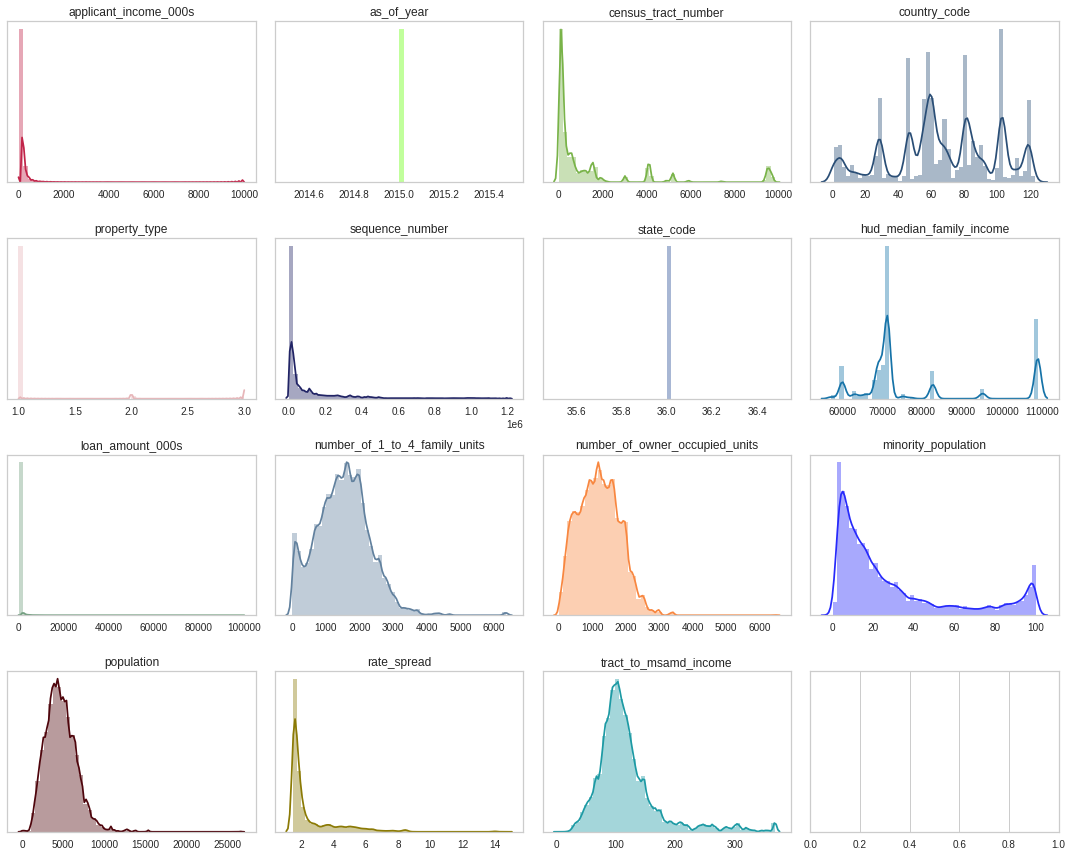

In [0]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, sharex = False, figsize=(15, 12))

# Generating random colors
colors = []
for i in range(len(num_list)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, num_list, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks = [], xlabel = '')
  ax.grid(False)
plt.tight_layout()

**Observation:**

- **Postively Skewed Features**
  - applicant_income_000s,
  - census_tract_number,
  - country_code,
  - property_type,
  - sequence_number,
  - hud_median_family_income,
  - loan_amount_000s,
  - number_of_1_to_4_family_units,
  - number_of_owner_occupied_units,
  - minority_population,
  - population,
  - rate_spread,
  - tract_to_msamd_income
- **Negatively Skewed Features**
  - NA
- **Normally Distributed Features**
  - as_of_year,
  - state_code

### **Categorical Data Distribution**

We shall plot all **categorical features to analyze the distribution** of the past data.
- But we need to find out the **length of features**. If the **length** of the features is considerably **high** we need to **skip** those **features** while analyzing categorical data distribution.
- Below we have **performed** an **iteration** over columns to find **categorical** **features**.

In [0]:
cat_features = []
for i in data.columns.values:
  if (data[i].dtype == object):
    cat_features.append(i)
print('Total Length:', len(cat_features))
print(cat_features)

Total Length: 23
['action_taken', 'agency_name', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant_ethnicity_name', 'co_applicant_race', 'co_applicant_sex', 'country_name', 'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'edit_status', 'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'purchaser_type', 'respondent_id', 'state_name']


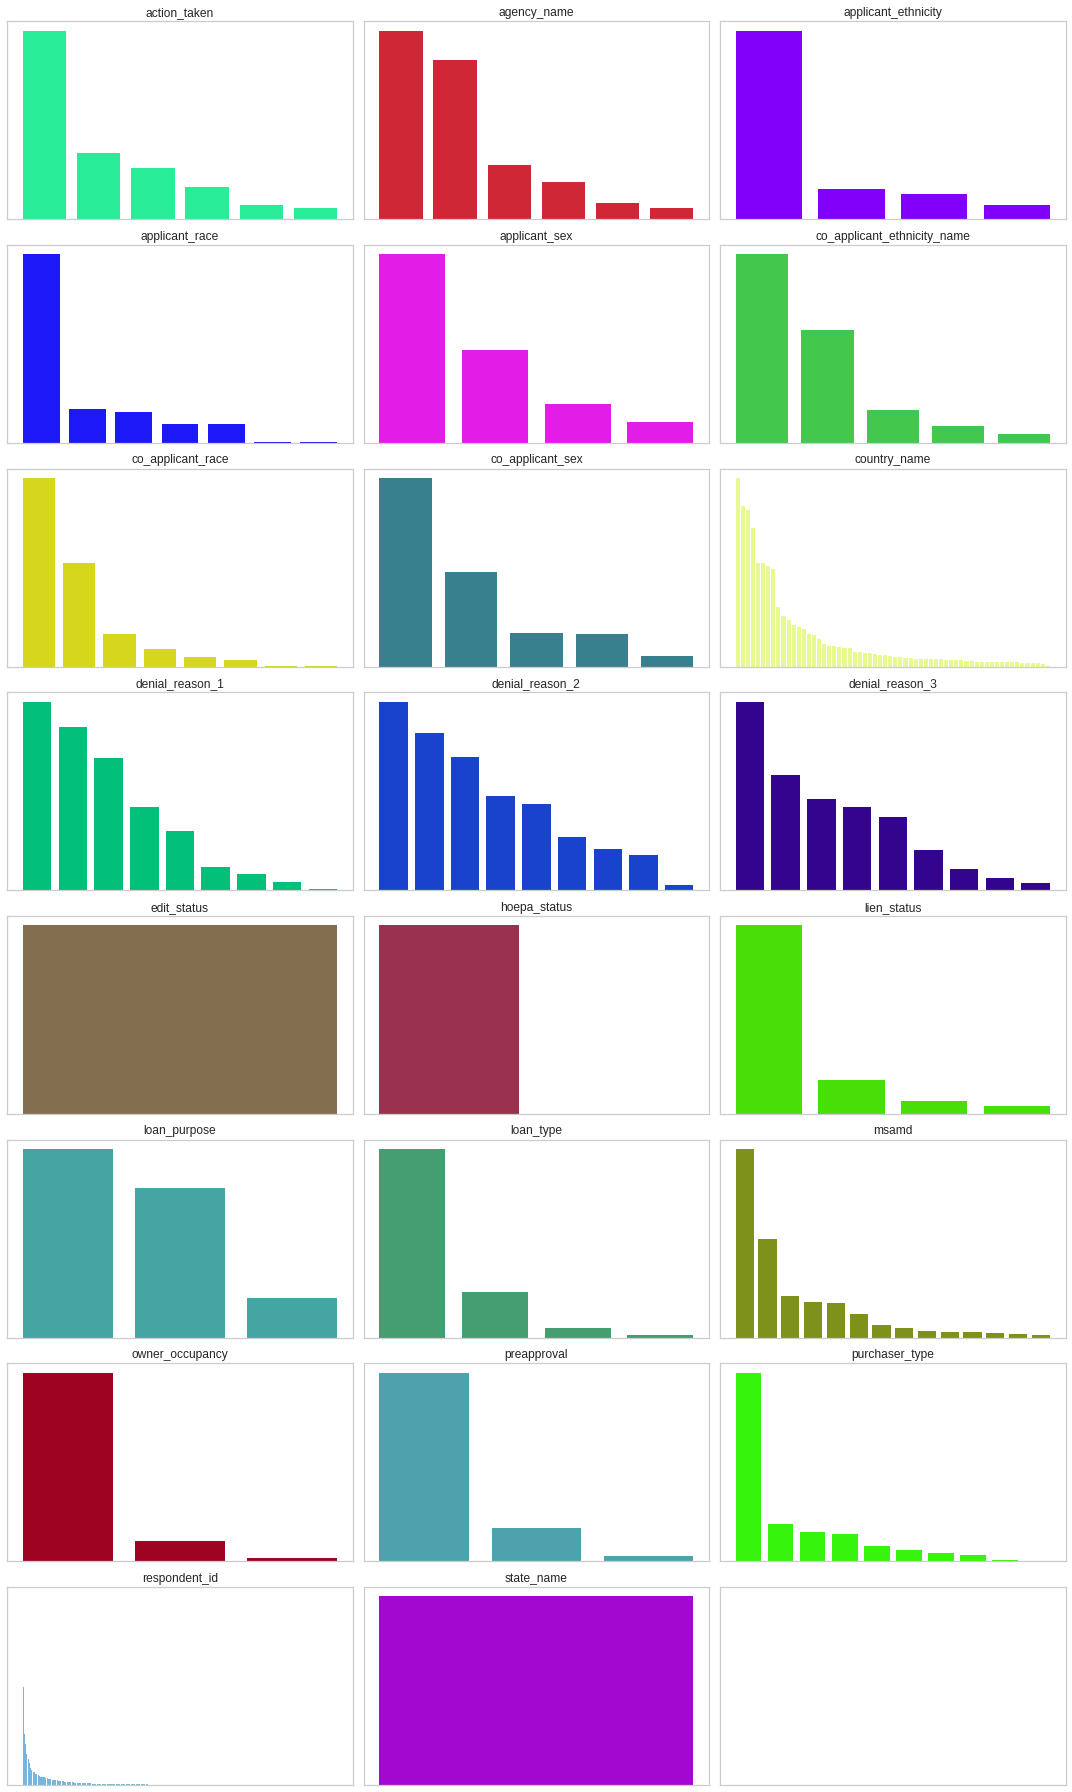

In [0]:
fig, axes = plt.subplots(nrows = 8, ncols = 3, sharex = False, figsize = (15, 25))

# Generating random colors
colors = []
for i in range(len(cat_features)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, cat_features, colors):
  ax.bar(x = data[col].value_counts().index, height = data[col].value_counts(), color = color)
  ax.set_title(col)
  plt.setp(axes, yticks = [], xticks = [])
  ax.grid(False)
  plt.tight_layout(pad = 1.08)
plt.show()

### **Pre Profiling Report**

In [0]:
#profile = ProfileReport(data)
#profile.to_file(outputfile = 'Pre Profiling Report.html')
#print('Accomplished!')

Accomplished!


**Observation:**

- Report shows that there are **26 categorical** features and **12 numerical** features.
- **~13%** of **inforamtion** is **missing** from the data.
- country_name and responded_id are found highly cardinal.
- **Features containing missing information** are:
  - **Feature &rarr; Missing Ratio**
  - applicant_income_000s &rarr; 13.9%
  - denial_reason_1 &rarr; 86.8%
  - denial_reason_2 &rarr; 97.3%
  - denial_reason_3 &rarr; 99.5%
  - edit_status &rarr; 80.9%
  - msamd &rarr; 8.3%
  - rate_spread &rarr; 98%
- **loan_amount_000s** is found to be **skewed** (**Positively**)
- **msamd** is **highly correlated** with **country_name**
- **country_name** is **highly correlated** with **msamd**

<a id = Section5></a>
# **5. Data Pre-Processing**

### **Identification & Handling of Missing Data**

**Before Handling Missing Data**

In [0]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (439650, 38)


Features,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,denial_reason_1,denial_reason_2,denial_reason_3,edit_status,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,respondent_id,sequence_number,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
Null Frequency,0.0,0.0,0.0,61003.00,0.0,0.0,0.0,1667.00,0.0,0.0,0.0,1192.00,1192.00,381642.00,427778.0,437276.00,355634.00,0.0,0.0,0.0,0.0,36375.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1667.00,0.0,2236.00,2049.00,1696.00,1696.00,430910.00,1771.0
Missing %age,0.0,0.0,0.0,13.88,0.0,0.0,0.0,0.38,0.0,0.0,0.0,0.27,0.27,86.81,97.3,99.46,80.89,0.0,0.0,0.0,0.0,8.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38,0.0,0.51,0.47,0.39,0.39,98.01,0.4


**Observation:**

- **Feature**  [ **Missing Ratio** ] &rarr; **Action to be taken**
  - **applicant_income_000s [ 13.8% ] &rarr; Replace with median income**
  - **census_tract_number [ 0.38% ] &rarr; Drop data rows**
  - **country_code [ 0.27% ] &rarr; Drop data rows**
  - **country_name [ 0.27% ] &rarr; Drop data rows**
  - **denial_reason_1 [ 86.81% ] &rarr; Replace with NA label & later analysis drop it** 
  - **denial_reason_2 [ 97.3% ] &rarr; Replace with NA label & later analysis drop it** 
  - **denial_reason_3 [ 99.46% ] &rarr; Replace with NA label & later analysis drop it** 
  - **edit_status [ 80.89% ] &rarr; Replace with NA label & later analysis drop it**
  - **msamd [ 8.27% ]; Replace with NA label**
  - **hud_median_family_income [ 0.38% ] &rarr; Drop data rows**
  - **number_of_1_to_4_family_units [ 0.51% ] &rarr; Drop data rows**
  - **number_of_owner_occupied_units [ 0.47% ] &rarr; Drop data rows**
  - **minority_population [ 0.39% ] &rarr; Drop data rows**
  - **population [ 0.39% ] &rarr; Drop data rows**
  - **rate_spread [ 98% ] &rarr; Drop Feature**
  - **tract_to_msamd_income [ 0.4% ] &rarr; Drop data rows** 

**Operations Applied**

In [0]:
before_shape = data.shape
data['applicant_income_000s'].fillna(value = data['applicant_income_000s'].median(), inplace = True)
data['denial_reason_1'].fillna(value = 'NA', inplace = True)
data['denial_reason_2'].fillna(value = 'NA', inplace = True)
data['denial_reason_3'].fillna(value = 'NA', inplace = True)
data['edit_status'].fillna(value = 'NA', inplace = True)
data['msamd'].fillna(value = 'NA', inplace = True)
data.drop(labels = 'rate_spread', axis = 1, inplace = True)
data.dropna(inplace = True)
data['denial_reason_1'] = data['denial_reason_1'].replace('NA', np.nan)
data['denial_reason_2'] = data['denial_reason_2'].replace('NA', np.nan)
data['denial_reason_3'] = data['denial_reason_3'].replace('NA', np.nan)
after_shape = data.shape

**After Handling Missing Data**

In [0]:
missing_ratio = np.round((before_shape[0]-after_shape[0])/before_shape[0], decimals = 2)*100
print('Data Shape [Before]:', before_shape)
print('Data Shape [After]:', after_shape)
print('Data Drop %age:', missing_ratio)

null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape [Before]: (439650, 38)
Data Shape [After]: (437100, 37)
Data Drop %age: 1.0


Features,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,denial_reason_1,denial_reason_2,denial_reason_3,edit_status,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,respondent_id,sequence_number,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379475.00,425346.00,434747.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.82,97.31,99.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We **dropped** only **1%** of missing **data**.
- We **retained** the **denial reasons** for **analysis** purpose.
- We have **cleansed** our **data**. Let's **move on** to the next stage of **finding** duplicacy in data.

### **Identification & Handling of Inconsistent Data Types**

- Following **features** contain **inconsitent data type**. A symbol &rarr; represents will be changed to:
  - **Feature** [ **Current Type** &rarr; **Desired Type** ]
  - respondent_id [ Object &rarr; Integer ]
  - number_of_1_to_4_family_units [ Float &rarr; Integer ]
  - number_of_owner_occupied_units [ Float &rarr; Integer ]
  - population [ Float &rarr; Integer ]

**Before changes: Respective Data types per Feature**

In [0]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,denial_reason_1,denial_reason_2,denial_reason_3,edit_status,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,respondent_id,sequence_number,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
Type,object,object,object,float64,object,object,int64,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,object,int64,int64,object,float64,int64,float64,float64,float64,float64,float64


**Performing Correction**

In [0]:
data['respondent_id'] = data['respondent_id'].str.replace('-', '0')

ls = ['respondent_id', 'number_of_1_to_4_family_units', 'number_of_owner_occupied_units', 'population']

for i in ls:
  data[i] = data[i].astype(int)
print('Success!')

Success!


**After changes: Respective Data types per Feature**

In [0]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,denial_reason_1,denial_reason_2,denial_reason_3,edit_status,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,respondent_id,sequence_number,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
Type,object,object,object,float64,object,object,int64,float64,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,float64,int64,int64,int64,float64,int64,float64


### **Identification & Handling of Duplicate Rows**

- Let's **identify** whether there **duplicate** **rows** present in the data or not.
- But we need to **drop** features like **respondent_id** and **sequence_number** as it is **uniquely idenfied** value.
- Before that we will **create** a copy of data and try some experimentation

In [0]:
# Making a copy of data
data2 = data.copy()

**Performing Experimentation on Copy**

In [0]:
before_shape = data2.shape
print('Data Shape [Before]:', before_shape)

data2 = data2.drop(labels = ['respondent_id', 'sequence_number'], axis = 1)

print('Contains Duplicate Rows?', data2.duplicated().any())

data2 = data2.drop_duplicates()

print('Drop Success!')

after_shape = data2.shape
missing_ratio = np.round((before_shape[0]-after_shape[0])/before_shape[0], decimals = 4)*100
print('Data Shape [After]:', after_shape)
print('Dropped Records Length', (before_shape[0] - after_shape[0]))
print('Drop Ratio:', missing_ratio, '%')

Data Shape [Before]: (437100, 37)
Contains Duplicate Rows? True
Drop Success!
Data Shape [After]: (436130, 35)
Dropped Records Length 970
Drop Ratio: 0.22 %


**Performing Final operations on Original Data**

In [0]:
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data = data.drop(labels = ['respondent_id', 'sequence_number'], axis = 1)

print('Contains Duplicate Rows?', data.duplicated().any())

data = data.drop_duplicates()

print('Drop Success!')

after_shape = data.shape
missing_ratio = np.round((before_shape[0]-after_shape[0])/before_shape[0], decimals = 4)*100
print('Data Shape [After]:', after_shape)
print('Total Records Length', (before_shape[0] - after_shape[0]))
print('Drop Ratio:', missing_ratio, '%')

Data Shape [Before]: (437100, 37)
Contains Duplicate Rows? True
Drop Success!
Data Shape [After]: (436130, 35)
Total Records Length 970
Drop Ratio: 0.22 %


### **Identification & Handling of Duplicate Columns**

Let's identify whether there are any **duplicate columns** in our data or not.

In [0]:
def duplicateCols(dataframe):
  '''Get a list of Duplicate valued Columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

is_duplicate_cols = duplicateCols(data2)
if (is_duplicate_cols is None):
  print('No Duplicate Columns')
else:
  print('Duplicate Columns are:', is_duplicate_cols)

No Duplicate Columns


**Observation:**

- It turns out that there are **no duplicate columns** present in our data.

### **Post Profiling Report**

In [0]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Post Profiling Report.html')
#print('Accomplished!')

Accomplished!


**Observation:**

- Profile report shows that there are **25 categorical** and **11 numerical** features.
- **~8%** of **information** is **still missing** due **because** of the **hypothesis** we **assumed**.
- **country_name** is still having **high** **cardinality**.
- Feature like **denial_reason_1, 2 & 3 have missing data**.
- loan_amount_000s is still highly skewed.
- **msamd** is **highly correlated** with **country_name**.

<a id = Section6></a>
# **6. Pre-Exploratory Data Analysis**

- Before initiating our analysis on our data, we need to **replace** certain **values** of features with **shorter description**. 
- There are certain features like **application_ethniticy**, **applicant_race**, **applicant_sex** that **contains long label**.  
- As we **currently focusing** on these **three features**, we will replace only these features labels.
- If you want to perform detailed analysis and during analysis found some interesting features with very long labels, the processs is the same as below:

In [0]:
data.replace({'applicant_ethnicity':{'Information not provided by applicant in mail, Internet, or telephone application':'Information not provided'},
              'applicant_race':{'Information not provided by applicant in mail, Internet, or telephone application':'Information not provided'},
              'applicant_sex':{'Information not provided by applicant in mail, Internet, or telephone application':'Information not provided'}}, 
             inplace = True)

**<h4>Question 1:** What is the **percentage frequency** of action taken on **applications**?</h4>

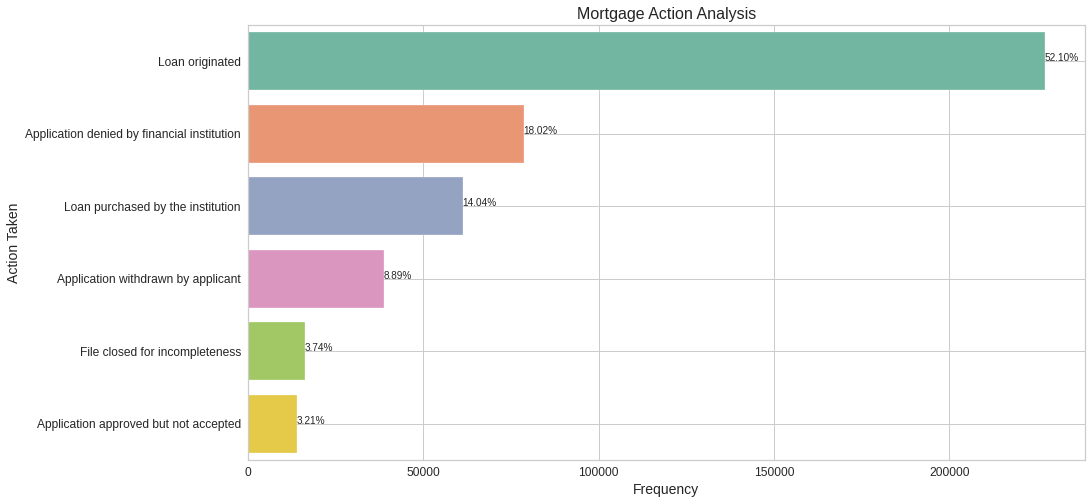

In [0]:
plt.figure(figsize = [15, 8])

ax = sns.barplot(data['action_taken'].value_counts(), data['action_taken'].value_counts().index,
                 palette  = sns.color_palette("Set2"))

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
        
plt.grid(b = True)
plt.xlabel('Frequency', size = 14)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Action Taken', size = 14)
plt.title('Mortgage Action Analysis', size = 16)
plt.show()

**Observation:**

- We can see that on **more than 50%** of applications loan was originated.
- Around **18**% of **applications** were **denied** by **finanical institution**.
- **14%** of loan were **purchased** by the **institution**.
- **~8.9%** of **applications** were **withdrawn** by the applicant.
- **~3.7%** of **applications** were **closed** due to **incompleteness**.
- **3.2%** of **applications** were **approved** but **not accepted**.

**<h4>Question 2:** What is the **frequency** **distribution** of various **Ethnic** Groups?</h4>

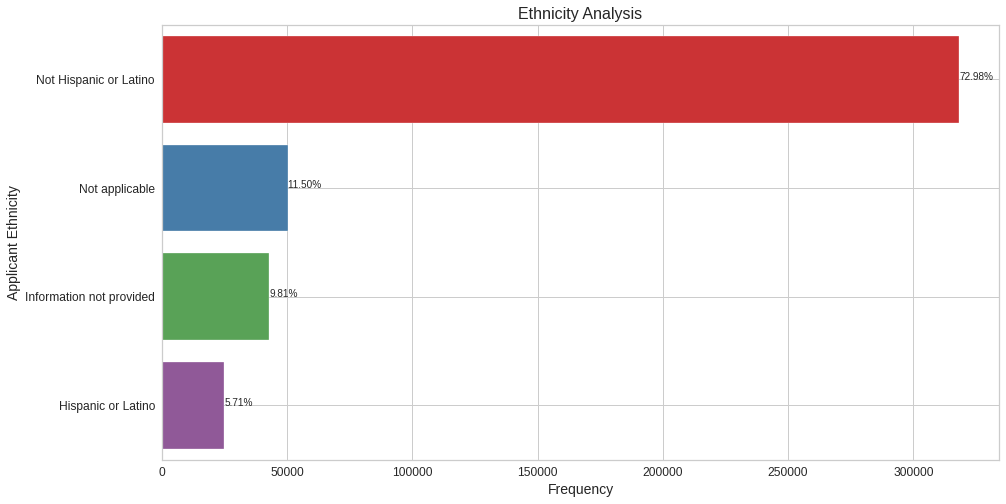

In [0]:
plt.figure(figsize = [15, 8])

ax = sns.barplot(data['applicant_ethnicity'].value_counts(), data['applicant_ethnicity'].value_counts().index,
                 palette  = sns.color_palette("Set1"))

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.grid(b = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Frequency', size = 14)
plt.ylabel('Applicant Ethnicity', size = 14)
plt.title('Ethnicity Analysis', size = 16)
plt.show()

**Observation:**

- **Around 72%** of **applicants** belongs **neither** to **Hispanic** **nor** to **Latino** group.
- **~5.7%** of **applicants** belong to **hispanic or latino group**.
- **~9.8%** of applicant **didn't provided any information**.
- **~11.5%** of applicants were **not applicable** for loan.

**<h4>Question 3:** Is there any **relationship** between **applicant's income and the appliation action taken**?</h4>

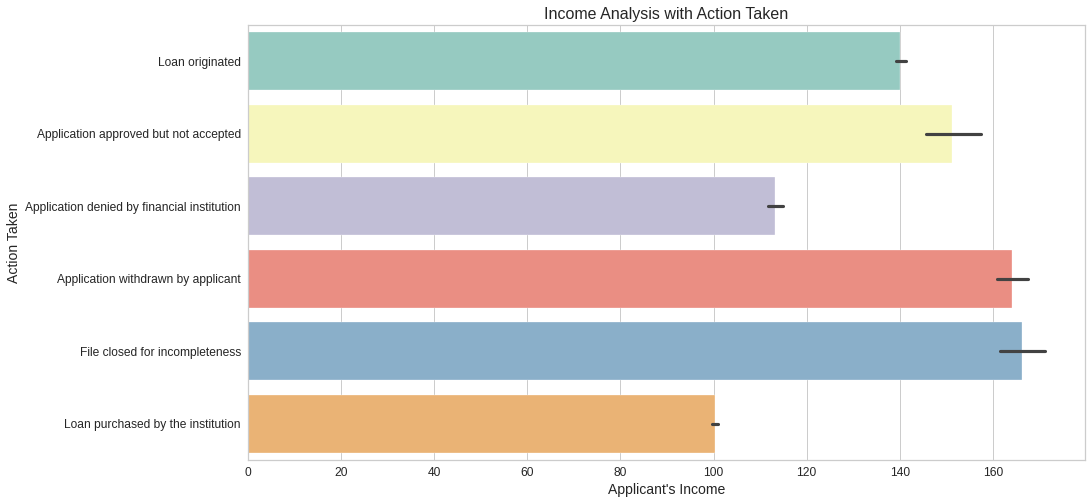

In [0]:
plt.figure(figsize = [15, 8])

ax = sns.barplot(x = data['applicant_income_000s'], y = data['action_taken'], palette  = sns.color_palette("Set3"))

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Applicant's Income", size = 14)
plt.ylabel('Action Taken', size = 14)
plt.title('Income Analysis with Action Taken', size = 16)
plt.show()

**Observation:**

- Applications with applicant's **income >= ~$\$$115k dollars** were either **originated** loan or **application approved but not accepted** or **application withdrawn** by applicant or **file close due to incompleteness**.
- Applications with applicants **income <= ~$\$$115k dollars** either **denied by the finanical institution** or **loan was purchased by the institution**.

**<h4>Question 4:** Is there any **relationship** between **applicant's income** and the **race of the applicant**?</h4>

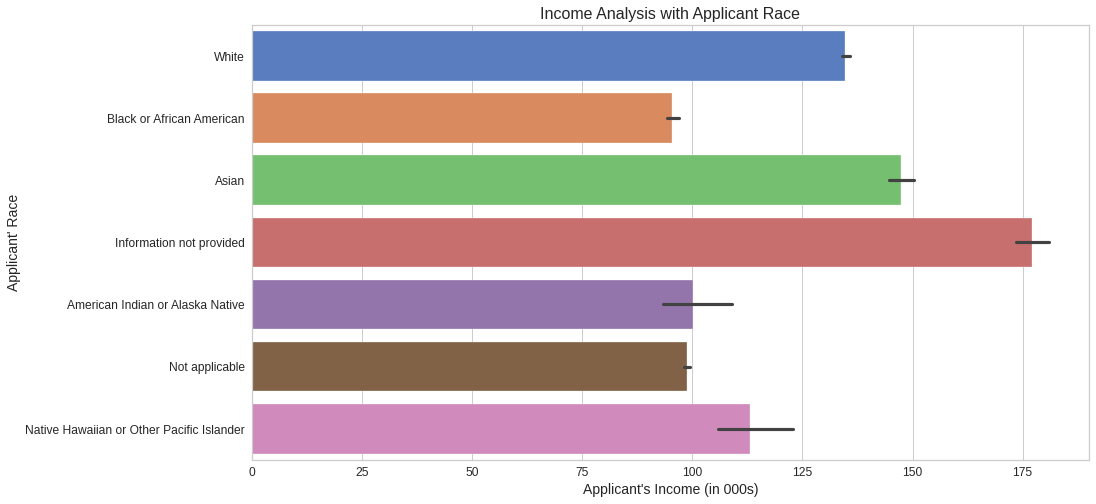

In [0]:
plt.figure(figsize = [15, 8])

ax = sns.barplot(x = data['applicant_income_000s'], y = data['applicant_race'], palette = sns.color_palette("muted"))

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel("Applicant's Income (in 000s)", size = 14)
plt.ylabel("Applicant' Race", size = 14)
plt.title('Income Analysis with Applicant Race', size = 16)
plt.show()

**Observation:**

- **Applicants** with **income more than $\$$170k dollars didn't provided any  information** about their race.
- On second position we can see that **Asian** race have total **annual income** more than any other race i.e. **~$\$$147k dollars**.
- We can also see that **applicants** having income **less than $\$$100k dollars** were **not applicable** for loans.

**<h4>Question 5:** What is the **relationship** between **applicant sex & action taken**?</h4>

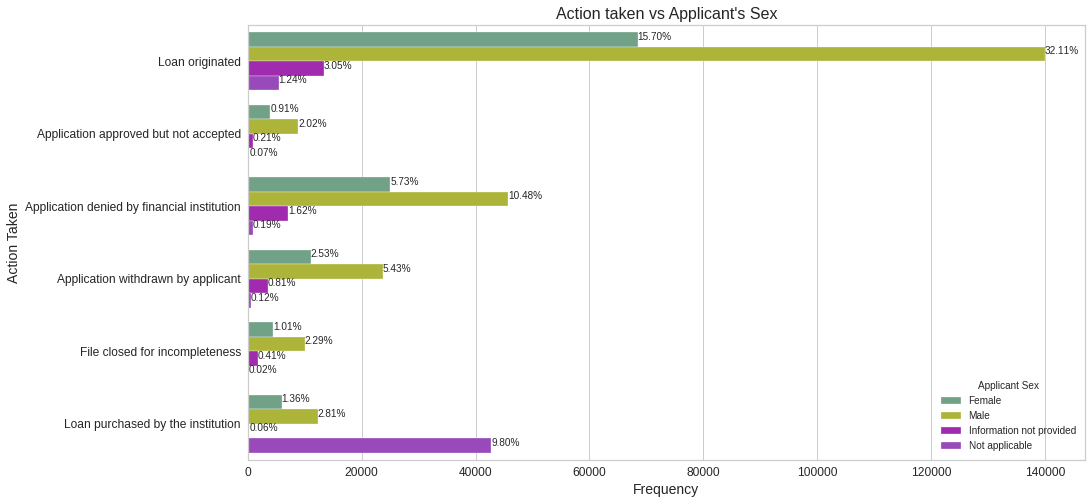

In [0]:
plt.figure(figsize = [15, 8])

colors = []
for i in range(5):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

ax = sns.countplot(y = 'action_taken',  data = data, hue = 'applicant_sex', palette = colors)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
        
plt.xticks(size = 12)
plt.yticks(size = 12)        
plt.ylabel('Action Taken', size = 14)
plt.xlabel('Frequency', size = 14)
plt.title("Action taken vs Applicant's Sex", size = 16)
ax.legend(loc = 'lower right', title = 'Applicant Sex')
plt.show()

**Observation:**

- There were **~32%** of applicants who were **male** and **~15.7% females** who **initiated** loan and **3%** of applicants **didn't provide any information** and around **1%** were **not applicable**.
- There were **~2%** of applicants who were **male** and **~1% females** whose **applications** were **approved but not accepted** and **0.2%** of applicants **didn't provide any information** and around **0.07%** were **not applicable**.
- There were **~10.5%** of applicants who were **male** and **~5.7% females** whose **application denied by financial institution** and **1.6%** of applicants **didn't provide any information** and around **0.1%** were **not applicable**.
- There were **~5.4%** of applicants who were **male** and **~2.5% females** who **withdraw the application** and **0.8%** of applicants **didn't provide any information** and around **0.1%** were **not applicable**.
- There were **~2.3%** of applicants who were **male** and **~1% females** whose **file** were **closed due to incompleteness** and **0.4%** of applicants **didn't provide any information** and around **0.02%** were **not applicable**.
- There were **~2.8%** of applicants who were **male** and **~1.3% females** whose **loan was purchased by the institution** and **0.06%** of applicants **didn't provide any information** and around **9.8%** were **not applicable**.


**<h4>Question 6:** What is the **relationship** between **applicant's enthnicity** and **action taken on the application**?</h4>

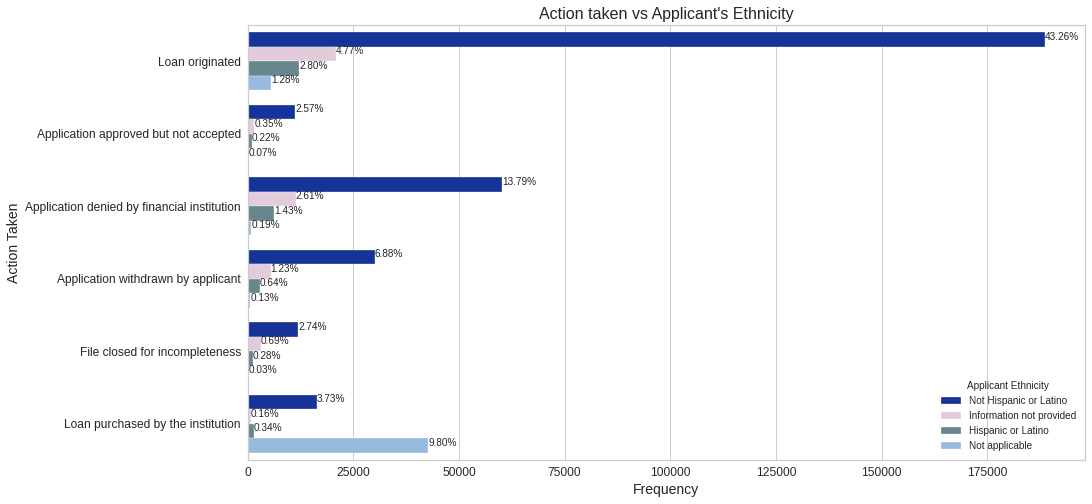

In [0]:
plt.figure(figsize = [15, 8])

colors = []
for i in range(4):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

ax = sns.countplot(y = 'action_taken',  data = data, hue = 'applicant_ethnicity', palette = colors)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.xticks(size = 12)
plt.yticks(size = 12)        
plt.ylabel('Action Taken', size = 14)
plt.xlabel('Frequency', size = 14)
plt.title("Action taken vs Applicant's Ethnicity", size = 16)
ax.legend(loc = 'lower right', title = 'Applicant Ethnicity')
plt.show()

**Observation:**

- There were **~43%** of applicants who were **neither hispanic nor latino** and **~2.7%** who were **either hispanic or latino** **initiated loan** while **4.7%** of applicants **didn't provide any information** and around **1.3%** were **not applicable**.
- There were **~2.5%** of applicants who were **neither hispanic nor latino** and **~0.2%** who were **either hispanic or latino** whose **applications** were **approved but not accepted** while **0.3%** of applicants **didn't provide any information** and around **0.07%** were **not applicable**.
- There were **~13.8%** of applicants who were **neither hispanic nor latino** and **~1.4%** who were **either hispanic or latino** whose **application denied by financial institution** while **2.6%** of applicants **didn't provide any information** and around **0.2%** were **not applicable**.
- There were **~6.9%** of applicants who were **neither hispanic nor latino** and **~0.6%** who were **either hispanic or latino** who **withdraw the application** while **1.2%** of applicants **didn't provide any information** and around **0.1%** were **not applicable**.
- There were **~2.7%** of applicants who were **neither hispanic nor latino** and **~2.8%** who were **either hispanic or latino** whose **file** were **closed due to incompleteness** while **0.7%** of applicants **didn't provide any information** and around **0.03%** were **not applicable**.
- There were **~3.7%** of applicants who were **neither hispanic nor latino** and **~0.3%** who were **either hispanic or latino** whose **loan was purchased by the institution** while **0.1%** of applicants **didn't provide any information** and around **9.7%** were **not applicable**.


**<h4>Question 7:** What is the **relationship** between **first denial reason and action taken on the application**?</h4>

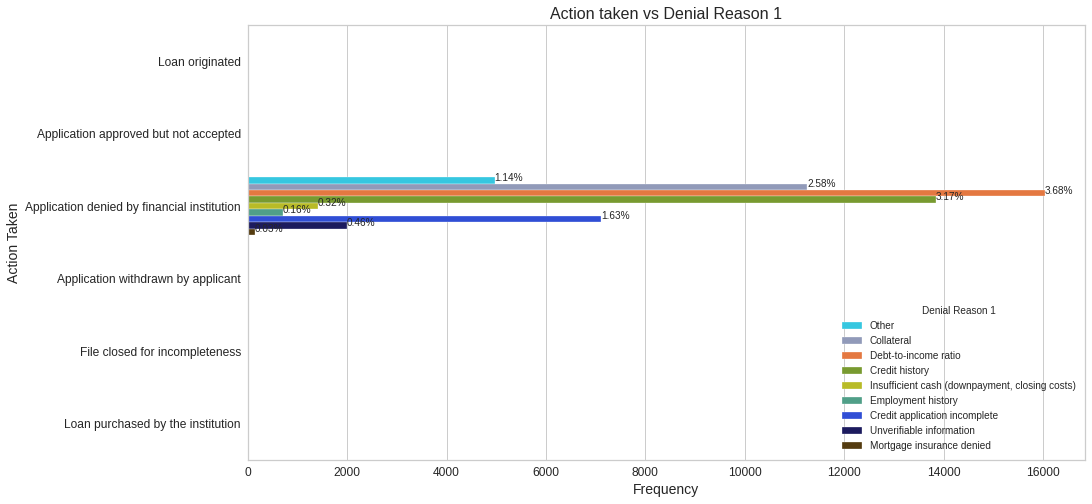

In [0]:
plt.figure(figsize = [15, 8])

colors = []
while (len(colors) < len(data['denial_reason_1'].unique())):
  r = '#%06X' % randint(0, 0xFFFFFF)
  if r not in colors:
    colors.append(r)

ax = sns.countplot(y = 'action_taken',  data = data, hue = 'denial_reason_1', palette = colors)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Action Taken', size = 14)
plt.xlabel('Frequency', size = 14)
plt.title("Action taken vs Denial Reason 1", size = 16)
ax.legend(loc = 'lower right', title = 'Denial Reason 1')
plt.show()

**Observation:**

- We can see that **major reason** of **application denied** by financial institution was **Debt-to-income ratio** which is **~3.7%**.
- On **second** highest **place** the reason of application denial by financial institution is **not** having **good credit history** and its ratio defines that which is 3.17%.
- And so on...


**<h4>Question 8:** What is the **relationship** between **second denial reason and action taken on the application**?</h4>

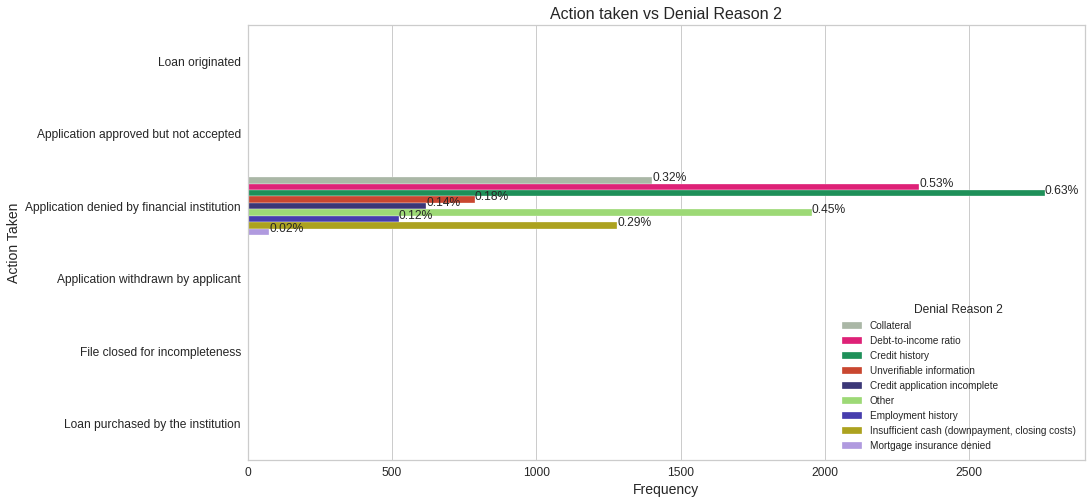

In [0]:
plt.figure(figsize = [15, 8])

# Generate random colors in certain range
colors = []
while (len(colors) < len(data['denial_reason_2'].unique())):
  r = '#%06X' % randint(0, 0xFFFFFF)
  if r not in colors:
    colors.append(r)

ax = sns.countplot(y = 'action_taken',  data = data, hue = 'denial_reason_2', palette = colors)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Action Taken', size = 14)
plt.xlabel('Frequency', size = 14)
plt.title("Action taken vs Denial Reason 2", size = 16)
ax.legend(loc = 'lower right', title = 'Denial Reason 2')
plt.show()

**Observation:**

- The **second highest denial reason** of application is **credit history** of the applicant.

**<h4>Question 9:** What is the **relationship** between **third denial reason and action taken on the application**?</h4>

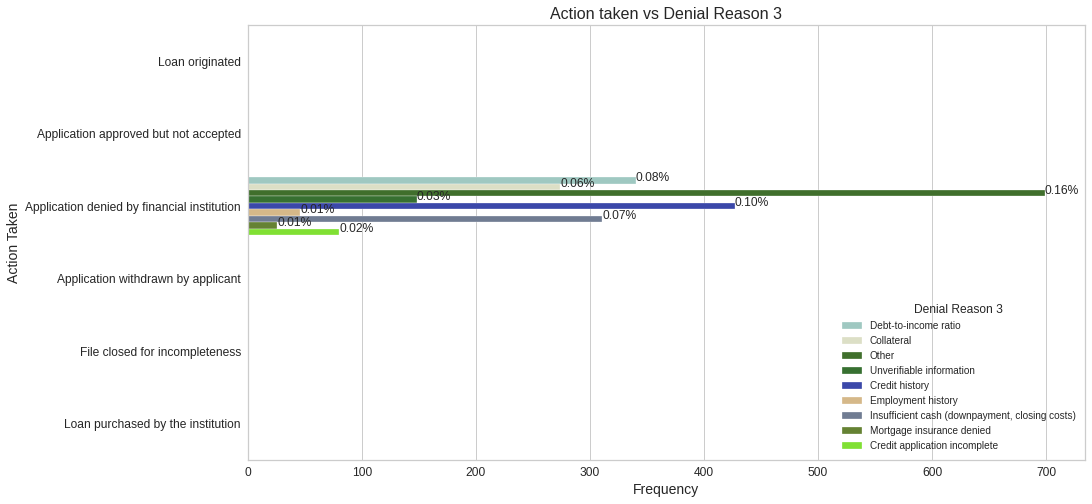

In [0]:
plt.figure(figsize = [15, 8])

colors = []
while (len(colors) < len(data['denial_reason_3'].unique())):
  r = '#%06X' % randint(0, 0xFFFFFF)
  if r not in colors:
    colors.append(r)

ax = sns.countplot(y = 'action_taken',  data = data, hue = 'denial_reason_3', palette = colors)

total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
        
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel('Action Taken', size = 14)
plt.xlabel('Frequency', size = 14)
plt.title("Action taken vs Denial Reason 3", size = 16)
ax.legend(loc = 'lower right', title = 'Denial Reason 3')
plt.show()

**Observation:**

- The **third highest reason** is **related** to **other category**.

From here onwards, **if you want to explore further, feel free to do so.**

<a id = Section7></a>
# **7. Post Data Processing & Analysis**

### **Dropping Unnecessary Features**
- From previous analysis we found that **following features contains** majority of **information missing**. 
  - denial_reason_1
  - denial_reason_2 
  - denial_reason_3
  - edit_status
- We will **drop** these **features** and **proceed** with **data prepartion** for **model building**.

In [0]:
print('Data Shape [Before]:',data.shape)
data.drop(labels = ['denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'edit_status'], axis = 1, inplace = True)
print('Data Shape [After]:', data.shape)

Data Shape [Before]: (436130, 35)
Data Shape [After]: (436130, 31)


### **Performing Label Encoding**

- Now we will **encode features** with the help of label encoder.
- We **won't** be **performing** **dummification** over data.
- Dummification will **increase** the **dimensions** of our data and will be **difficult** to **handle** by machine.

In [0]:
encoder = LabelEncoder()

for i in data.columns.values:
  if (data[i].dtype == object):
    data[i] = encoder.fit_transform(data[i])

print('Label Encoding Accomplished!')

print('Data Shape [After]:',data.shape)

data.head(2)

Label Encoding Accomplished!
Data Shape [After]: (436130, 31)


,action_taken,agency_name,applicant_ethnicity,applicant_income_000s,applicant_race,applicant_sex,as_of_year,census_tract_number,co_applicant_ethnicity_name,co_applicant_race,co_applicant_sex,country_code,country_name,hoepa_status,lien_status,loan_purpose,loan_type,msamd,owner_occupancy,preapproval,property_type,purchaser_type,state_code,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,4,0,2,97.0,6,0,2015,3007.0,2,5,3,59.0,29,1,2,1,0,9,2,0,1,7,36,0,109000.0,187,363,1817,21.139999,5870,109.459999
1,4,0,2,200.0,6,2,2015,111.0,2,5,3,61.0,30,1,2,1,0,10,2,0,1,1,36,0,71300.0,460,53,256,45.959999,3512,160.600006


### **Feature Selection using Random Forest**

- **Random forests** are one the most **popular machine learning algorithms**. - They **provide**,
 - **a good predictive performance**,
 -**low overfitting and**
 -**easy interpretability.** 
-This interpretability **derives** the **importance of each feature** on the tree decision. In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

In [0]:
# Data Preparation for model
X = data.drop('action_taken', axis = 1)
y = data['action_taken']

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [0]:
# Have some patience, may take some time :)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42))

sel.fit(X_train, y_train)

selected_feat= X_train.columns[(sel.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

Total Features Selected are 14
Features: ['agency_name', 'applicant_income_000s', 'applicant_sex', 'census_tract_number', 'co_applicant_ethnicity_name', 'co_applicant_sex', 'lien_status', 'purchaser_type', 'loan_amount_000s', 'number_of_1_to_4_family_units', 'number_of_owner_occupied_units', 'minority_population', 'population', 'tract_to_msamd_income']


**Observation:**

- We can see that there are total **14 features** that have been **estimated** **important** by **Random Forest**.

### **Extracting Important Features for Model Development**

**Data Shape Before Selecting Important Features**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (348904, 30) (348904,)
Testing Data Shape: (87226, 30) (87226,)


In [0]:
# Data Preparation for model
X = data[selected_feat]
y = data['action_taken']

# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

**Data Shape After Selecting Important Features**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (348904, 14) (348904,)
Testing Data Shape: (87226, 14) (87226,)


<a id = Section8></a>
# **8. Model Development & Evaluation**

- As our **data** is **imbalanced** so we will be plotting Precision Recall Curve.
- Below we have made a **custom function** which will help us in **evaluation** the **model performance**.

In [0]:
def PRCurve(model):
  '''
  A function to visualize Precision Recall Curve.
  Returns average precision score of the model.
  Data to fit must be training i.e. X_train, y_train.
  Data score will be estimated on X_test, y_test.
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

<a id = Section81></a>
## **8.1 Baseline Models**

<a id = Section811></a>
#### **8.1.1 Logistic Regression**

Accuracy Score (Train Data): 0.521
Accuracy Score (Test Data): 0.521
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2797
           1       0.00      0.00      0.00     15722
           2       0.00      0.00      0.00      7752
           3       0.00      0.00      0.00      3260
           4       0.52      1.00      0.69     45448
           5       0.23      0.00      0.00     12247

    accuracy                           0.52     87226
   macro avg       0.13      0.17      0.11     87226
weighted avg       0.30      0.52      0.36     87226



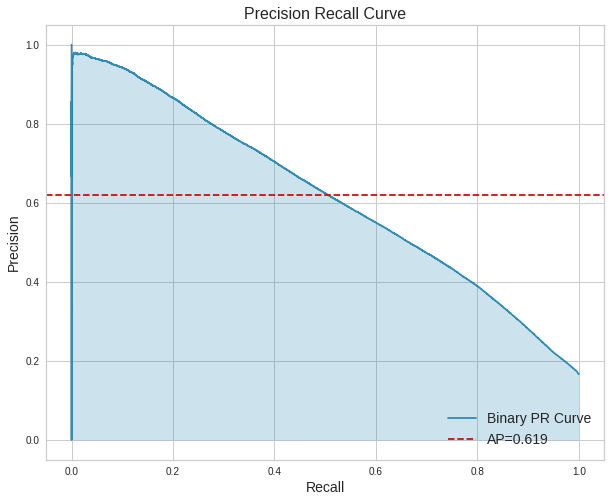

In [0]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- We **obtained** only **52%** of **accuracy** on our data using Logistic Regression.
- The **average precision** score turns out be around **~62%**.
- Let's see how decision tree will behave over this data.

<a id = Section812></a>
#### **8.1.2 Decision Tree Classifier**

Accuracy Score (Train Data): 0.713
Accuracy Score (Test Data): 0.713
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2797
           1       0.45      0.35      0.39     15722
           2       0.00      0.00      0.00      7752
           3       0.00      0.00      0.00      3260
           4       0.71      0.98      0.82     45448
           5       1.00      1.00      1.00     12247

    accuracy                           0.71     87226
   macro avg       0.36      0.39      0.37     87226
weighted avg       0.59      0.71      0.64     87226



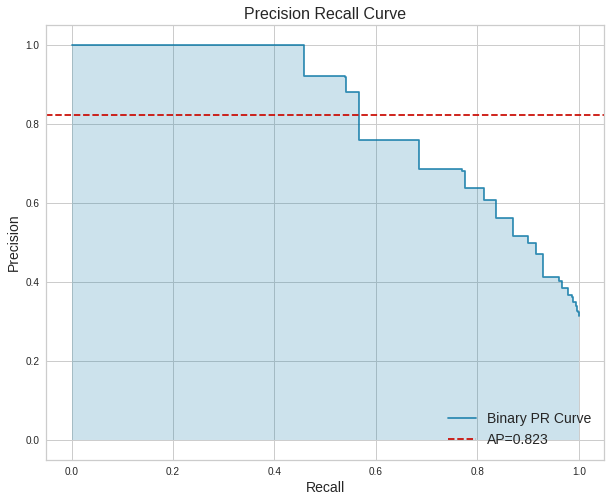

In [0]:
# Have some patience, might take some time :)
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 3))

# Classification Report
decision_report = classification_report(y_test, y_pred)
print(decision_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = dtc)
plt.show()

**Observation:**

- Well! we saw **some improvement over the logistic regression**.
- The **accuracy** has **improved** from **52% to 71%**.
- The **avearge precision** score has **also improved **from **62% to 82%**. That's quite a jump.
- But we need more improvement, so let's try other models as well.

<a id = Section813></a>
#### **8.1.3 Random Forest Classifier**

Accuracy Score (Train Data): 0.671
Accuracy Score (Test Data): 0.672
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2797
           1       0.71      0.08      0.14     15722
           2       0.00      0.00      0.00      7752
           3       0.00      0.00      0.00      3260
           4       0.62      0.99      0.76     45448
           5       1.00      1.00      1.00     12247

    accuracy                           0.67     87226
   macro avg       0.39      0.35      0.32     87226
weighted avg       0.59      0.67      0.56     87226



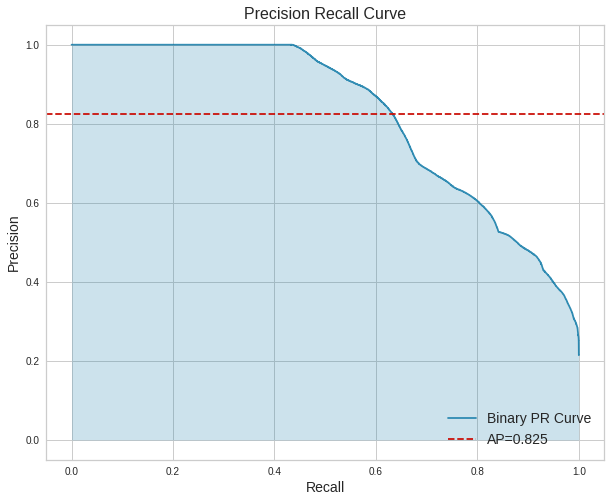

In [0]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- Random Forest **performed bad** in terms of **accuracy** i.e. about **67%** only.
- The **average precision score** also turns out to be **not so good**. It has only **improved** **only 0.2%** than Decision Tree.
- Lets try Extreme Gradient Boosting over this data.

<a id = Section814></a>
#### **8.1.4 Extreme Gradient Boosting Classifier**

Accuracy Score (Train Data): 0.744
Accuracy Score (Test Data): 0.745
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2797
           1       0.47      0.68      0.56     15722
           2       0.42      0.04      0.08      7752
           3       0.43      0.01      0.02      3260
           4       0.81      0.92      0.86     45448
           5       1.00      1.00      1.00     12247

    accuracy                           0.74     87226
   macro avg       0.52      0.44      0.42     87226
weighted avg       0.70      0.74      0.70     87226



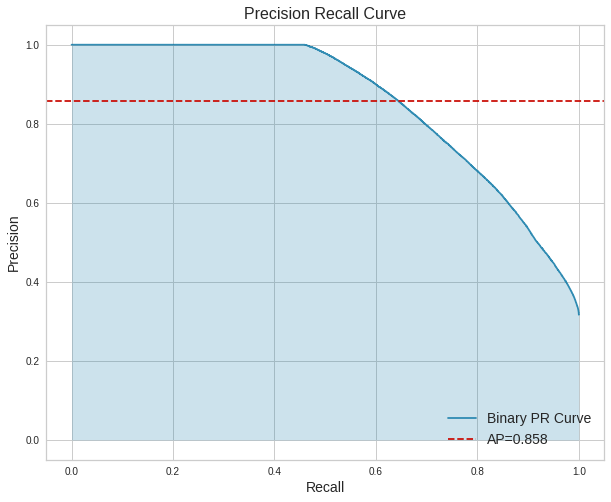

In [0]:
# Have some patience, might take some time :)
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42, num_class = 6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- The **accuracy** on our data has **improved** to **74%**.
- The **average precision score** has **improved** to **85%**.
- But due to **undersampling** of **minority classes** we can see that **some classes have 0% precision and 0% recall**.
- In the next section we will apply SMOTE over data and analyze our results.

<a id = Section82></a>
## **8.2 Oversampling Models**

#### **SMOTE Technique & its Implementation**

- SMOTE refers to **Synthetic Minority Oversampling Technique**.
- It **aims** to **balance class distribution** by **randomly** **increasing minority class** examples **by replicating** them. 
- It **synthesises** **new minority instances** **between** **existing** minority **instances**. 
- **It generates the virtual training records by linear interpolation for the minority class.** 
- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**. 
- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

**Before Implimenting SMOTE**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (348904, 14) (348904,)
Testing Data Shape: (87226, 14) (87226,)


In [0]:
data['action_taken'].value_counts()

4    227241
1     78609
5     61236
2     38760
3     16297
0     13987
Name: action_taken, dtype: int64

**Performing SMOTE Operation**

In [0]:
# Have some patience, may take some time :)
sm = SMOTE(random_state = 42, sampling_strategy = 'auto')
X_new, y_new = sm.fit_sample(X, y)

X_frame = pd.DataFrame(data = X_new, columns = X.columns.values)

X_train, X_test, y_train, y_test = train_test_split(X_frame, y_new, test_size = 0.2, random_state = 42, stratify = y_new)

**After Implimenting SMOTE**

In [0]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1090756, 14) (1090756,)
Testing Data Shape: (272690, 14) (272690,)


In [0]:
SMOTE_target = pd.DataFrame(data = y_new, columns = ['action_taken'])
SMOTE_target['action_taken'].value_counts()

5    227241
4    227241
3    227241
2    227241
1    227241
0    227241
Name: action_taken, dtype: int64

<a id = Section821></a>
#### **8.2.1 Logistic Regression**

Accuracy Score (Train Data): 0.195
Accuracy Score (Test Data): 0.195
              precision    recall  f1-score   support

           0       0.18      0.02      0.03     45448
           1       0.20      0.22      0.21     45448
           2       0.20      0.05      0.09     45448
           3       0.21      0.27      0.23     45449
           4       0.19      0.27      0.22     45449
           5       0.18      0.34      0.24     45448

    accuracy                           0.19    272690
   macro avg       0.19      0.19      0.17    272690
weighted avg       0.19      0.19      0.17    272690



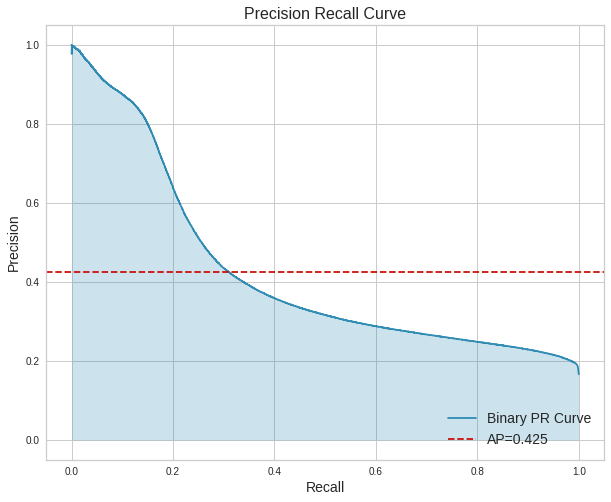

In [0]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- The **accuracy** has **dropped** from **52% to 19%**. It **happens** **because** the **data was imbalanced**, so our model was not working precisely.
- The **average precision score** has also **dropped** from **61% to 45%**.
- But **Precision and Recall scores** for **individual classes** has **improved** from **baseline model** of Logistic Regression.

<a id = Section822></a>
#### **8.2.2 Decision Tree Classifier**

Accuracy Score (Train Data): 0.485
Accuracy Score (Test Data): 0.487
              precision    recall  f1-score   support

           0       0.28      0.86      0.42     45448
           1       0.60      0.13      0.22     45448
           2       0.00      0.00      0.00     45448
           3       0.29      0.26      0.27     45449
           4       0.90      0.67      0.77     45449
           5       1.00      1.00      1.00     45448

    accuracy                           0.49    272690
   macro avg       0.51      0.49      0.45    272690
weighted avg       0.51      0.49      0.45    272690



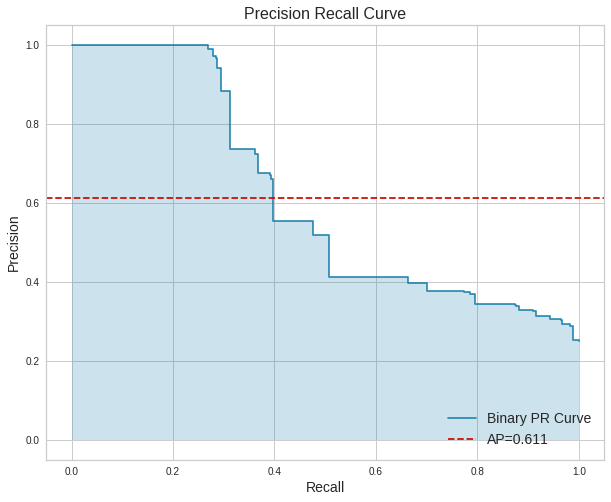

In [0]:
# Have some patience, might take some time :)
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 3))

# Classification Report
decision_report = classification_report(y_test, y_pred)
print(decision_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = dtc)
plt.show()

**Observation:** 

- The **accuracy** has **dropped** from **71% to 49%**.
- The **average precision score** has also **dropped** from **82% to 61%**.
- The **individual classes** has **improved** and gets better in terms of **Precision and Recall** from the previous model baseline model and recently made model.

<a id = Section823></a>
#### **8.2.3 Random Forest Classifier**

Accuracy Score (Train Data): 0.523
Accuracy Score (Test Data): 0.524
              precision    recall  f1-score   support

           0       0.33      0.47      0.39     45448
           1       0.43      0.35      0.39     45448
           2       0.26      0.13      0.17     45448
           3       0.33      0.49      0.40     45449
           4       0.88      0.71      0.79     45449
           5       1.00      1.00      1.00     45448

    accuracy                           0.52    272690
   macro avg       0.54      0.52      0.52    272690
weighted avg       0.54      0.52      0.52    272690



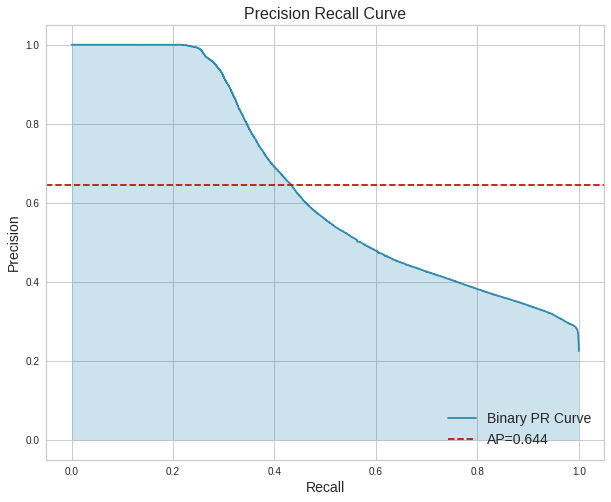

In [0]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- The **accuracy** has **dropped** from **67% to 52%** from baseline model.
- The **average precision score** has also **dropped** from **82% to 64%** from baseline model.
- Things are getting better.

<a id = Section824></a>
#### **8.2.4 Extreme Gradient Boosting Classifier**

Accuracy Score (Train Data): 0.572
Accuracy Score (Test Data): 0.572
              precision    recall  f1-score   support

           0       0.39      0.47      0.43     45448
           1       0.46      0.40      0.43     45448
           2       0.35      0.16      0.22     45448
           3       0.39      0.52      0.44     45449
           4       0.77      0.88      0.83     45449
           5       1.00      1.00      1.00     45448

    accuracy                           0.57    272690
   macro avg       0.56      0.57      0.56    272690
weighted avg       0.56      0.57      0.56    272690



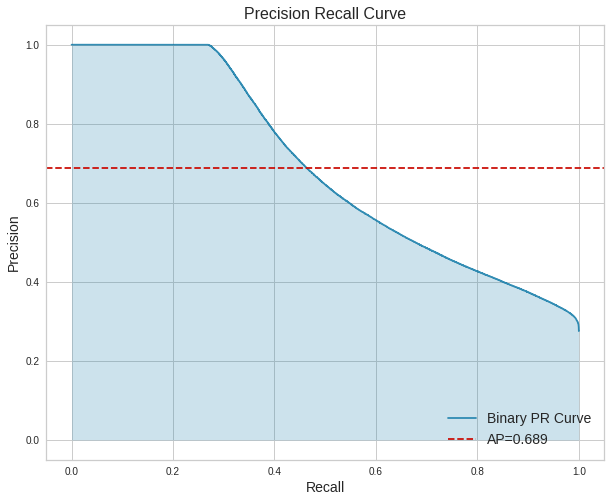

In [0]:
# Have some patience, might take some time :)
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42, num_class = 6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- The **accuracy** has **dropped** from **74% to 57%** from baseline model.
- The **average precision score** has also **dropped** from **85% to 69%**.
- But our **results for individual classes** has **improved** and got much **better** from previous **baseline models** and **recent previous model**.

## **Model Performances**

In [0]:
model_names = ['--------------------Logistic Regression---------------------\n',
               '\n------------------Decision Tree Classifier------------------\n',  
               '\n------------------Random Forest Classifier------------------\n', 
               '\n------------Extreme Gradient Boosting Classifier------------\n']
report = model_names[0] + logistic_report + model_names[1] + decision_report + model_names[2] + random_forest_report + model_names[3] + XGB_report
print(report)

--------------------Logistic Regression---------------------
              precision    recall  f1-score   support

           0       0.18      0.02      0.03     45448
           1       0.20      0.22      0.21     45448
           2       0.20      0.05      0.09     45448
           3       0.21      0.27      0.23     45449
           4       0.19      0.27      0.22     45449
           5       0.18      0.34      0.24     45448

    accuracy                           0.19    272690
   macro avg       0.19      0.19      0.17    272690
weighted avg       0.19      0.19      0.17    272690

------------------Decision Tree Classifier------------------
              precision    recall  f1-score   support

           0       0.28      0.86      0.42     45448
           1       0.60      0.13      0.22     45448
           2       0.00      0.00      0.00     45448
           3       0.29      0.26      0.27     45449
           4       0.90      0.67      0.77     45449
          

## **Feature Importances:**

Now that we know that **XGBoost** outperformed other models, we can check **which features** have been cateogrized as **important** learned by the **model**.

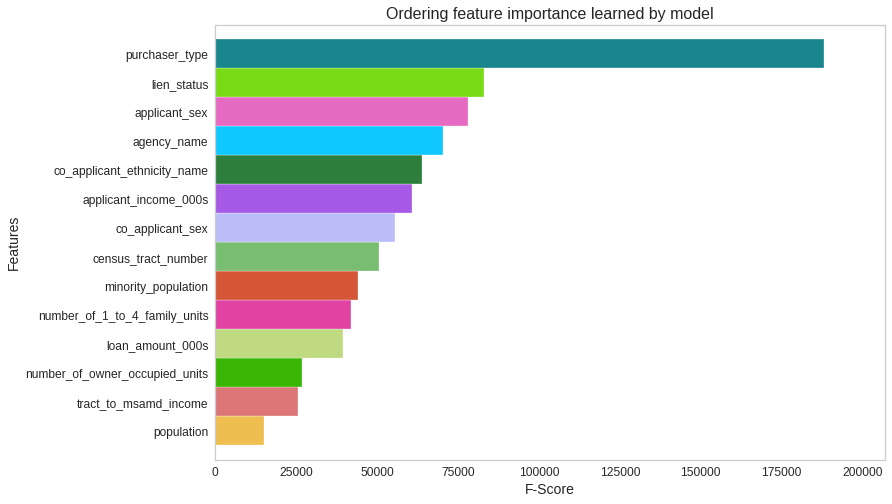

In [0]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(1, 1, 1)

colors = []
for i in range(14):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

ax = plot_importance(clf, height = 1, color = colors, grid = False, show_values = False, importance_type = 'cover', ax = ax)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('F-Score', size = 14)
plt.ylabel('Features', size = 14)
plt.title('Ordering feature importance learned by model', size = 16)
plt.show()

## **Tree Generation**

- For the **visualization purpose** we have **generated** and **saved** a **Tree** based on the **information** learned by our model.

In [0]:
# Setting parameters 
cond_node_param = {'shape':'box', 'style': 'filled, rounded', 'fillcolor': '#e85f7b', 'fontcolor':'#e6edec'}
leaf_param = {'shape':'circle', 'style': 'filled, rounded', 'fillcolor': '#90BAB2', 'shape-size':'small'}

# Generating tree
image = to_graphviz(clf, yes_color = '#308D6D', no_color = '#EB7D93', condition_node_params = cond_node_param, leaf_node_params=leaf_param)

# Exporting image due to large size
image.render(filename='TREE', format='png')
print('Done!')

Done!


<a id = Section9></a>
# **9. Conclusion**

* We **investigated** in depth about which **features** are **important** to **retain** and which to **discard** using **Random Forest Classifier**.
* **Important Features were** (agency_name, applicant_income_000s, applicant_sex, census_tract_number, co_applicant_ethnicity_name, co_applicant_sex, lien_status, purchaser_type, loan_amount_000s, number_of_1_to_4_family_units, number_of_owner_occupied_units, minority_population, population, tract_to_msamd_income)
* We **investigated** in depth about the **data** through the **analysis**.
* We **faced multi-class** classification **problem** and built models like Logistic Regression, Decision Tree Classifier, Random Forest Classifier and Extreme Gradient Boosting Classifier.
* We **built baseline model** and **applied SMOTE** over data to handle imbalanced classes and **analyzed** **again** our model.
* **At the end** we **achieve better result using XGBoost** Algorithm outperforming in terms of accuracy and average precision score.